## Supply Chain Management and optimization

### 1) Problem statement
-	Objective: Optimize supply chain operations by analyzing order patterns, customer behavior, delivery efficiency, and website interaction logs.
-	Key Focus Areas:
1.	Predict late deliveries and identify factors causing delays. ( Currently focusing on this, after this is delivered we will consider below )
2.	Analyze product sales trends and customer purchase patterns.
3.	Integrate web access logs with supply chain data to study product interest and purchase conversion



### 2) Data Collection
- Dataset Source - https://data.mendeley.com/datasets/8gx2fvg2k6/5
- The data consists of 53 columns and 180519 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df_order = pd.read_csv('data/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1') # as problem with default utf8

#### Show Top 5 Records

In [3]:
df_order.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


#### Shape of the dataset

In [4]:
df_order.shape

(180519, 53)

### 2.2 Dataset information

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

In [5]:
df_accesslogs = pd.read_csv('data/tokenized_access_logs.csv')
df_accesslogs

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...
...,...,...,...,...,...,...,...,...
469972,Nike Men's Free TR 5.0 TB Training Shoe,as seen on tv!,10/9/2017 21:21,Oct,21,footwear,93.166.57.36,/department/footwear/category/as%20seen%20on%2...
469973,Under Armour Hustle Storm Medium Duffle Bag,fitness accessories,10/9/2017 21:21,Oct,21,footwear,126.175.2.58,/department/footwear/category/fitness%20access...
469974,Under Armour Hustle Storm Medium Duffle Bag,fitness accessories,10/9/2017 21:22,Oct,21,footwear,201.210.19.242,/department/footwear/category/fitness%20access...
469975,Nike Men's Dri-FIT Victory Golf Polo,women's apparel,10/9/2017 21:22,Oct,21,golf,56.81.167.135,/department/golf/category/women's%20apparel/pr...


In [6]:
pd.read_csv('data/DescriptionDataCoSupplyChain.csv')

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


### Lets consider about joining the dataframe based on `Product` column

In [7]:
df_order[df_order['Product Name'].apply(str.strip).apply(str.lower)=='''Nike Men's Dri-FIT Victory Golf Polo	'''.strip().lower()] # present
df_order[df_order['Product Name'].apply(str.strip).apply(str.lower)=='''adidas Kids' RG III Mid Football Cleat	'''.strip().lower()] # not present

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


In [8]:
# So, lets do the inner join
# merged_df = pd.merge(df_order, df_accesslogs, left_on='Product Name', right_on='Product', how='inner')
# merged_df
# ERROR ENCOUNTERED: MemoryError: Unable to allocate 23.6 GiB for an array with shape (3171173631,) and data type int64

In [9]:
chunk_size = 100000  # MemoryError: Unable to allocate 13.0 GiB for an array with shape (1746650766,) and data type int64

# merged_chunks = []

# for i in range(0, len(df_order), chunk_size):
#     df_order_chunk = df_order.iloc[i:i + chunk_size]
#     merged_chunk = pd.merge(df_order_chunk, df_accesslogs, left_on='Product Name', right_on='Product', how='inner')
#     merged_chunks.append(merged_chunk)

# merged_df = pd.concat(merged_chunks, ignore_index=True)

# So, now we can use dask OR better if we can delete the columns that are highly unlikely to be not needed

In [10]:
product_mapping = df_order[['Product Name', 'Product Card Id']].drop_duplicates()
product_mapping

,Product Name,Product Card Id
0,Smart watch,1360
48,Perfect Fitness Perfect Rip Deck,365
49,Under Armour Girls' Toddler Spine Surge Runni,627
50,Nike Men's Dri-FIT Victory Golf Polo,502
55,Under Armour Men's Compression EV SL Slide,278
...,...,...
52077,Merrell Women's Grassbow Sport Hiking Shoe,646
52147,Toys,1361
52676,Pelican Sunstream 100 Kayak,1073
77012,Pelican Maverick 100X Kayak,1059


In [11]:
# Count unique Product Card Ids for each Product Name
product_name_cardid_count = df_order.groupby('Product Name')['Product Card Id'].nunique()

# Display Product Names that have more than one Product Card Id
multiple_cardid = product_name_cardid_count[product_name_cardid_count > 1]
print(multiple_cardid)   # So, 1:1 mapping. we can drop one 

Series([], Name: Product Card Id, dtype: int64)


In [12]:
# Dropping product card id because we need the product name to join with df_access
# then get label if requried via onehot encoding or label encoder

In [13]:
df_order.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [14]:
# 1. Late Deliveries and Identify Factors Causing Delays
# Using domain knowledge and the columns that are highly unlikely to be not needed
target = 'Late_delivery_risk'

features = [
    'Days for shipping (real)', 
    'Days for shipment (scheduled)', 
    'Benefit per order', 
    'Sales per customer', 
    'Category Id', 
    'Category Name', 
    'Department Id', 
    'Department Name', 
    'Latitude', 
    'Longitude', 
    'Market', 
    'Order City', 
    'Order State', 
    'Order Country', 
    'Order Item Quantity', 
    'Order Status', 
    'Order Region', 
    'Shipping Mode', 
    'Product Status', 
    'Product Category Id', 
    'Product Price', 
    'Order Profit Per Order', 
    'Order Item Discount Rate', 
    'Order Item Total'
]


In [15]:
# Filtered feature and target columns
columns_to_keep = features + [target]

# Filter the DataFrame
df = df_order[columns_to_keep]

# Display the shape of the filtered DataFrame
print("Filtered DataFrame shape:", df.shape)


Filtered DataFrame shape: (180519, 25)


In [16]:
len(df.columns.tolist())

25

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [17]:
df.isna().sum()

Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Category Id                      0
Category Name                    0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order State                      0
Order Country                    0
Order Item Quantity              0
Order Status                     0
Order Region                     0
Shipping Mode                    0
Product Status                   0
Product Category Id              0
Product Price                    0
Order Profit Per Order           0
Order Item Discount Rate         0
Order Item Total                 0
Late_delivery_risk               0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [18]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [19]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Sales per customer             180519 non-null  float64
 4   Category Id                    180519 non-null  int64  
 5   Category Name                  180519 non-null  object 
 6   Department Id                  180519 non-null  int64  
 7   Department Name                180519 non-null  object 
 8   Latitude                       180519 non-null  float64
 9   Longitude                      180519 non-null  float64
 10  Market                         180519 non-null  object 
 11  Order City                     180519 non-null  object 
 12  Order State                   

### 3.4 Checking the number of unique values of each column

In [20]:
uniques = df.nunique()
uniques

Days for shipping (real)             7
Days for shipment (scheduled)        4
Benefit per order                21998
Sales per customer                2927
Category Id                         51
Category Name                       50
Department Id                       11
Department Name                     11
Latitude                         11250
Longitude                         4487
Market                               5
Order City                        3597
Order State                       1089
Order Country                      164
Order Item Quantity                  5
Order Status                         9
Order Region                        23
Shipping Mode                        4
Product Status                       1
Product Category Id                 51
Product Price                       75
Order Profit Per Order           21998
Order Item Discount Rate            18
Order Item Total                  2927
Late_delivery_risk                   2
dtype: int64

### 3.5 Check statistics of data set

In [21]:
df.describe() # for numerical data - 27 numerical cols

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Department Id,Latitude,Longitude,Order Item Quantity,Product Status,Product Category Id,Product Price,Order Profit Per Order,Order Item Discount Rate,Order Item Total,Late_delivery_risk
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,31.851451,5.443460,29.719955,-84.915675,2.127638,0.0,31.851451,141.232550,21.974989,0.101668,183.107609,0.548291
std,1.623722,1.374449,104.433526,120.043670,15.640064,1.629246,9.813646,21.433241,1.453451,0.0,15.640064,139.732492,104.433526,0.070415,120.043670,0.497664
min,0.000000,0.000000,-4274.979980,7.490000,2.000000,2.000000,-33.937553,-158.025986,1.000000,0.0,2.000000,9.990000,-4274.979980,0.000000,7.490000,0.000000
25%,2.000000,2.000000,7.000000,104.379997,18.000000,4.000000,18.265432,-98.446312,1.000000,0.0,18.000000,50.000000,7.000000,0.040000,104.379997,0.000000
50%,3.000000,4.000000,31.520000,163.990005,29.000000,5.000000,33.144863,-76.847908,1.000000,0.0,29.000000,59.990002,31.520000,0.100000,163.990005,1.000000
75%,5.000000,4.000000,64.800003,247.399994,45.000000,7.000000,39.279617,-66.370583,3.000000,0.0,45.000000,199.990005,64.800003,0.160000,247.399994,1.000000
max,6.000000,4.000000,911.799988,1939.989990,76.000000,12.000000,48.781933,115.263077,5.000000,0.0,76.000000,1999.989990,911.799988,0.250000,1939.989990,1.000000


#### Insight
- From above description of numerical data, mean late delivery risk is 55% approx, we need to reduce it
- Profit margin is almost 15.6% on selling price
- Average late delivery is by 3.50-2.93 = 0.57 days

### 3.7 Exploring Data

In [22]:
df.sample(5)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Department Id,Department Name,Latitude,Longitude,...,Order Status,Order Region,Shipping Mode,Product Status,Product Category Id,Product Price,Order Profit Per Order,Order Item Discount Rate,Order Item Total,Late_delivery_risk
76466,2,4,75.199997,159.990005,48,Water Sports,7,Fan Shop,44.078777,-12.106936,...,PENDING_PAYMENT,Central America,Standard Class,0,48,199.990005,75.199997,0.20,159.990005,0
66904,3,4,34.099998,117.580002,17,Cleats,4,Apparel,18.241507,-66.370621,...,COMPLETE,Western Europe,Standard Class,0,17,59.990002,34.099998,0.02,117.580002,0
8042,2,4,16.340000,45.000000,24,Women's Apparel,5,Golf,18.244823,-66.370575,...,CLOSED,Western Europe,Standard Class,0,24,50.000000,16.340000,0.10,45.000000,0
81760,2,4,60.520000,126.089996,18,Men's Footwear,4,Apparel,39.630035,-78.743195,...,COMPLETE,North Africa,Standard Class,0,18,129.990005,60.520000,0.03,126.089996,0
165745,1,0,-915.150024,351.980011,45,Fishing,7,Fan Shop,36.084808,-115.172615,...,PENDING_PAYMENT,Western Europe,Same Day,0,45,399.980011,-915.150024,0.12,351.980011,1


In [23]:
# Extract categorical columns (both 'category' and 'object' dtype)
categorical_columns = df.select_dtypes(include=['category', 'object'])

# Extract unique categories for each categorical column
categories_dict = {}
for col in categorical_columns.columns:
    categories_dict[col] = df[col].unique()

# Display the categories for each categorical column
categories_dict


{'Category Name': array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
        'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
        "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
        "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
        'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
        'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
        'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
        'Golf Balls', 'Strength Training', "Children's Clothing",
        'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
        'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
        'Video Games', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
        'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
        'Water Sports', 'Indoor/Outdoor Games'], dtype=object),
 'Department Name': array(['Fitness', 'Apparel', 'Golf', 'Footwe

In [24]:
# Convert related columns to categorical
# df['Rating'] = df['Rating'].astype('category')

# Verify the data types
print(df.dtypes)

Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market                            object
Order City                        object
Order State                       object
Order Country                     object
Order Item Quantity                int64
Order Status                      object
Order Region                      object
Shipping Mode                     object
Product Status                     int64
Product Category Id                int64
Product Price                    float64
Order Profit Per Order           float64
Order Item Discount Rate         float64
Order Item Total                 float64
Late_delivery_ri

In [25]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
# #OR
# numerical_features = df.select_dtypes(include=['int64', 'float64'])

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# categorical_features = df.select_dtypes(include=['category', 'object'])  # !!



# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 16 numerical features : ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Category Id', 'Department Id', 'Latitude', 'Longitude', 'Order Item Quantity', 'Product Status', 'Product Category Id', 'Product Price', 'Order Profit Per Order', 'Order Item Discount Rate', 'Order Item Total', 'Late_delivery_risk']
We have 9 categorical features : ['Category Name', 'Department Name', 'Market', 'Order City', 'Order State', 'Order Country', 'Order Status', 'Order Region', 'Shipping Mode']


In [26]:
df.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Department Id,Department Name,Latitude,Longitude,...,Order Status,Order Region,Shipping Mode,Product Status,Product Category Id,Product Price,Order Profit Per Order,Order Item Discount Rate,Order Item Total,Late_delivery_risk
0,3,4,91.250000,314.640015,73,Sporting Goods,2,Fitness,18.251453,-66.037056,...,COMPLETE,Southeast Asia,Standard Class,0,73,327.75,91.250000,0.04,314.640015,0
1,5,4,-249.089996,311.359985,73,Sporting Goods,2,Fitness,18.279451,-66.037064,...,PENDING,South Asia,Standard Class,0,73,327.75,-249.089996,0.05,311.359985,1


### 3.8 

#####  Insights
 - 

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

#####  Insights
- 

<Axes: >

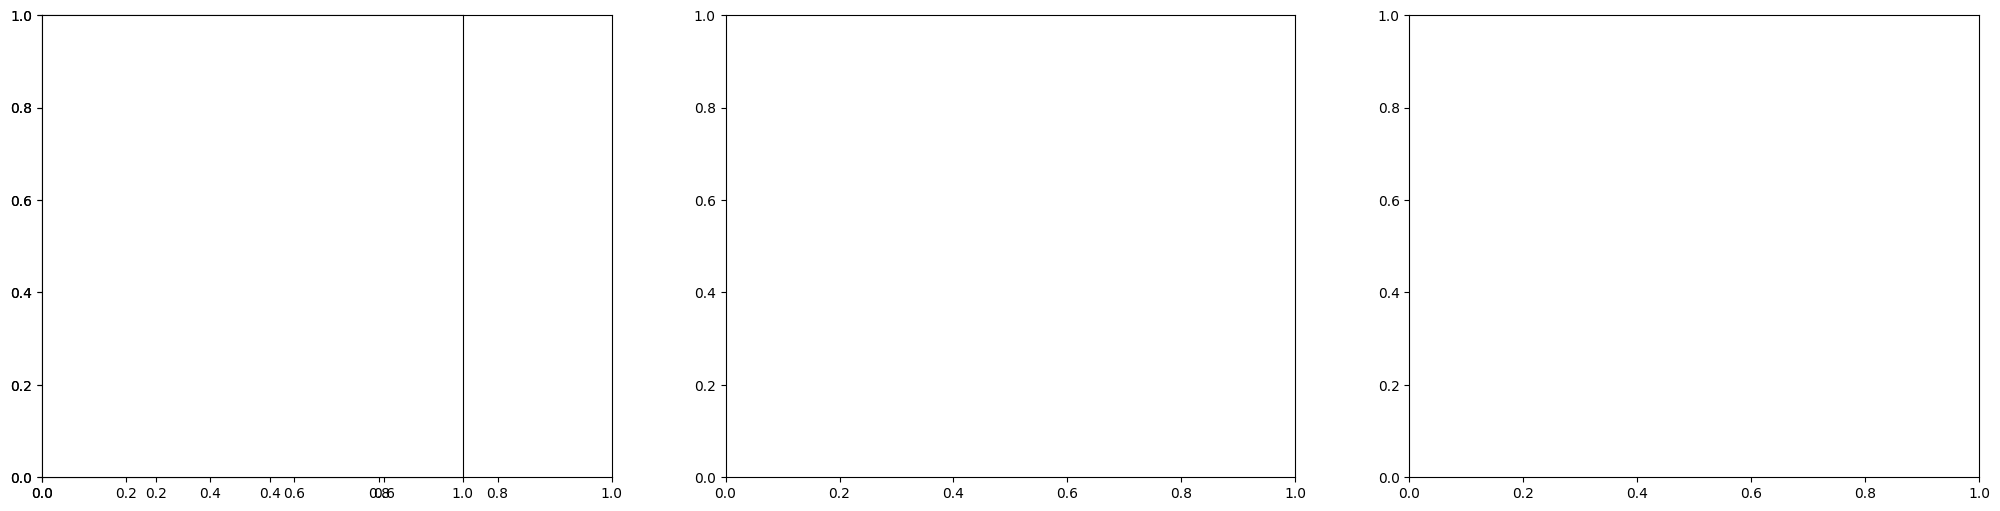

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
# ax =sns.histplot(data=df,x='',kde=True,hue='')

#####  Insights


#### 4.2 Maximumum score of students in all three subjects

In [28]:

# plt.figure(figsize=(18,8))
# plt.subplot(1, 4, 1)
# plt.title('')
# sns.violinplot(y='',data=df,color='red',linewidth=3)
# ...
# plt.show()

#### Insights
- 

#### 4.3 Multivariate analysis using pieplot

#####  Insights
- 

#### 4.4 Feature Wise Visualization
#### 4.4.1

#### UNIVARIATE ANALYSIS ( How is distribution ? )

In [29]:
# f,ax=plt.subplots(1,2,figsize=(20,10))
# sns.countplot(x=df[''],data=df,palette ='bright',ax=ax[0],saturation=0.95)
# for container in ax[0].containers:
#     ax[0].bar_label(container,color='black',size=20)
    
# plt.pie(x=df[''].value_counts(),labels=[],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
# plt.show()

#### Insights 
-

#### BIVARIATE ANALYSIS ( ) 

In [30]:
# numeric_cols = []
# gender_group = df.groupby('gender')[numeric_cols].mean()

# gender_group

#### Insights 

#### 4.4.2 RACE/EHNICITY COLUMN
- 

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

#### Insights 
-

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

#### Insights 
- 
-

#### 4.4.3

#### UNIVARIATE ANALYSI

#### Insights 
- 

#### BIVARIATE ANALYSIS 

In [31]:
# numeric_cols = []
# df.groupby('')[numeric_cols].agg('mean').plot(kind='barh',figsize=(10,10))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

#### Insights 
- 

#### 4.4.4 Other Feature COLUMNs 


#### UNIVARIATE ANALYSIS ( Which region the order is ususually late ? )

#### Insights 
- 

#### BIVARIATE ANALYSIS (  If one feature has any impact on late delivery ? )

#### Insights 
- 

#### 4.4.5 

#### BIVARIATE ANALYSIS

In [32]:
# plt.figure(figsize=(12,6))
# plt.subplot(2,2,1)
# sns.barplot (x=df[''], y=df[''], hue=df[''])
# plt.subplot(2,2,2)
# sns.barplot (x=df[''], y=df[''], hue=df[''])
# plt.subplot(2,2,3)
# sns.barplot (x=df[''], y=df[''], hue=df[''])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

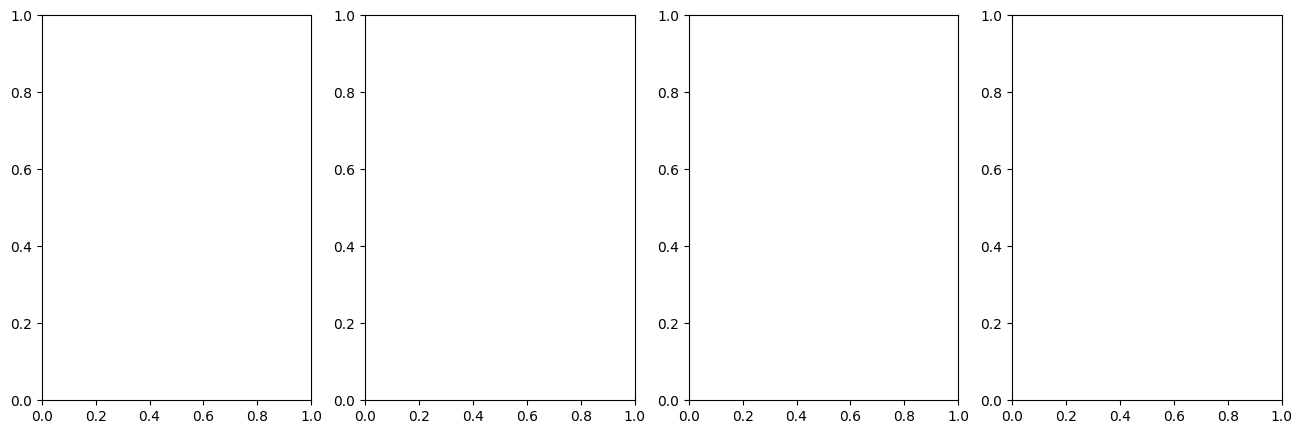

In [33]:
plt.subplots(1,4,figsize=(16,5))
# plt.subplot(141)
# sns.boxplot(df['Days for shipping (real)'],color='skyblue')
# plt.subplot(142)
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

In [34]:
# sns.pairplot(df,hue = 'gender')
# plt.show()

#### Insights
- 

### 5. Conclusions
